In [1]:
%matplotlib inline

import os
import glob
import pandas as pd
import seaborn as sns
import tables

def read_feat_events(feat_file):
    fid= tables.File(feat_file, 'r')
    
    features_events = {}
    node = fid.get_node('/features_events')
    for worn_n in node._v_children.keys():
        worm_node = fid.get_node('/features_events/' + worn_n)
        
        for feat in worm_node._v_children.keys():
            if not feat in features_events:
                features_events[feat] = {}
            dat = fid.get_node(worm_node._v_pathname, feat)[:]
            features_events[feat][worn_n] = dat
            
    #features_events = {feat:np.concatenate(val) for feat, val in features_events.items()}
    return features_events

results_dir = '/Volumes/behavgenom_archive$/Avelino/test_unc-4/040417/Results'

assert os.path.exists(results_dir)
feature_files = glob.glob(os.path.join(results_dir, '*_features.hdf5'))

medians_split = pd.DataFrame()
timeseries_data = pd.DataFrame()
features_events = {}
for feat_file in feature_files:
    base_name = os.path.basename(feat_file).replace('_features.hdf5', '')
    base_name = base_name.partition('_Ch1')[0]
    print(base_name)
    with pd.HDFStore(feat_file, 'r') as fid:
        tab = fid['/features_summary/medians_split']
        tab['base_name'] = base_name
        medians_split = pd.concat([medians_split, tab])
        
        
        tab_s = fid['/features_timeseries']
        tab_s['base_name'] = base_name
        timeseries_data = pd.concat([timeseries_data, tab_s])
        
    features_events[base_name] = read_feat_events(feat_file)
        



L4_unc-4_ceh12_set1
unc-4_ceh-12_set1
unc-4_set2
L4_unc-4_ceh12_set1
unc-4_set2
unc-4_ceh-12_set1
L4_unc-4_set1
L4_unc-4_set1


In [16]:
grouped = medians_split.groupby('base_name')
print(grouped.aggregate({'worm_index':len}))

len(medians_split)




                     worm_index
base_name                      
L4_unc-4_ceh12_set1        85.0
L4_unc-4_set1             144.0
unc-4_ceh-12_set1         135.0
unc-4_set2                175.0
['forward_time', 'forward_distance', 'backward_time', 'backward_distance', 'paused_time', 'paused_distance']


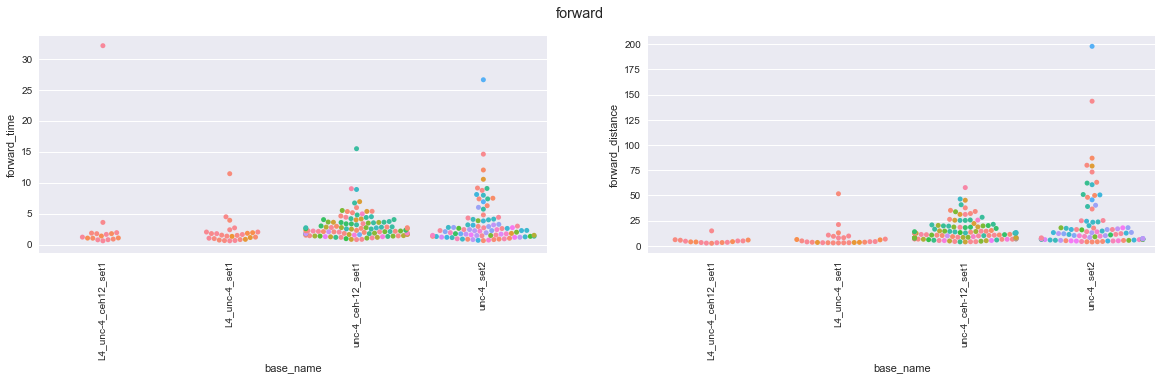

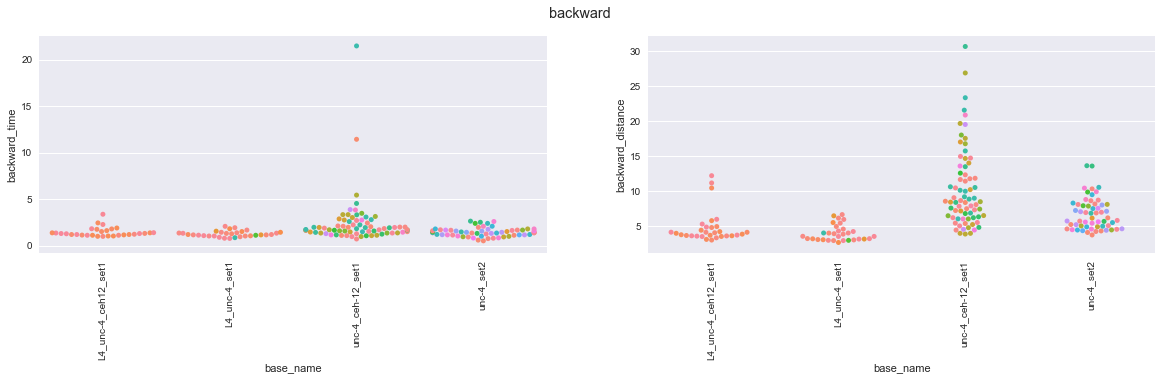

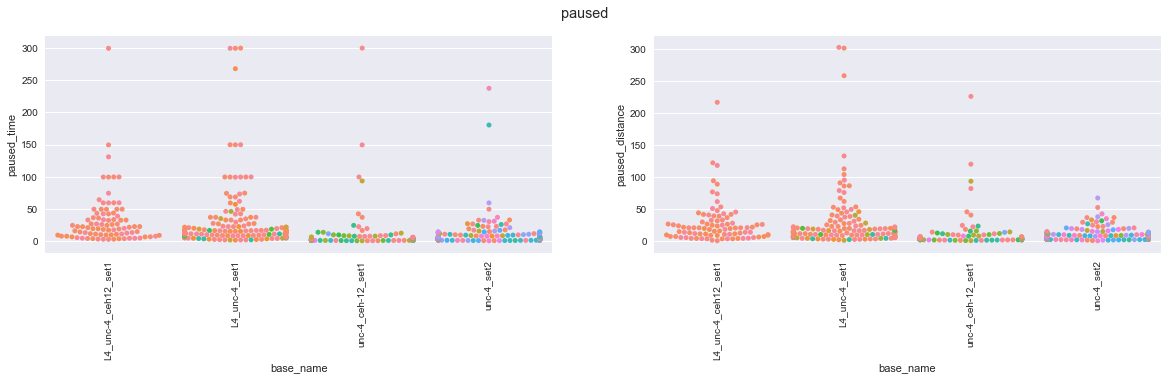

In [21]:
import matplotlib.pylab as plt

base_names = medians_split['base_name'].unique()
lab_order = sorted(base_names)

#[x for x in medians_split.columns if 'backward' in x]
for ftype1 in ['forward', 'backward', 'paused']:
    plt.figure(figsize=(20,4))  
    for icol, ftype2 in enumerate(['_time', '_distance']):
        feat = ftype1 + ftype2
        plt.subplot(1, 2, icol+1)
        ax =sns.swarmplot(x="base_name", y=feat, hue='worm_index', data=medians_split, order=lab_order)
        ax.legend_.remove()
        for item in ax.get_xticklabels():
            item.set_rotation(90)
            
    plt.suptitle(ftype1)

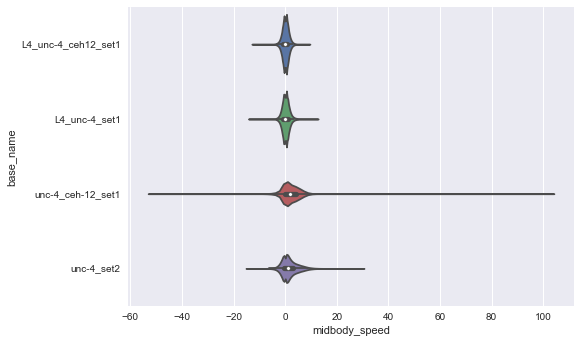

In [10]:

sns.violinplot(y="base_name", x="midbody_speed", data=timeseries_data, order=lab_order)

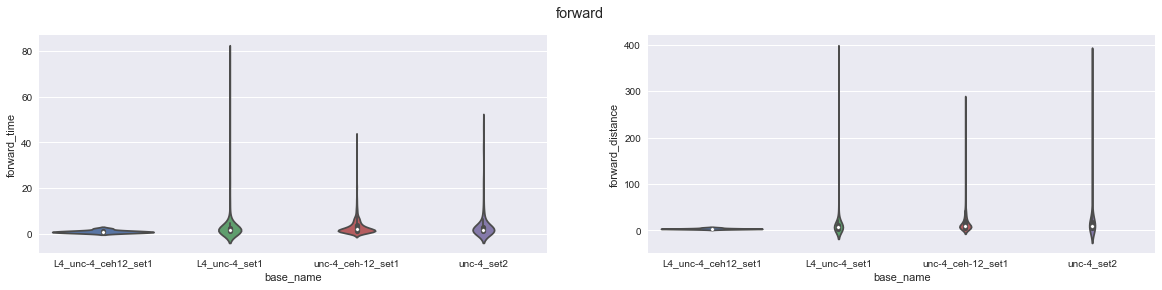

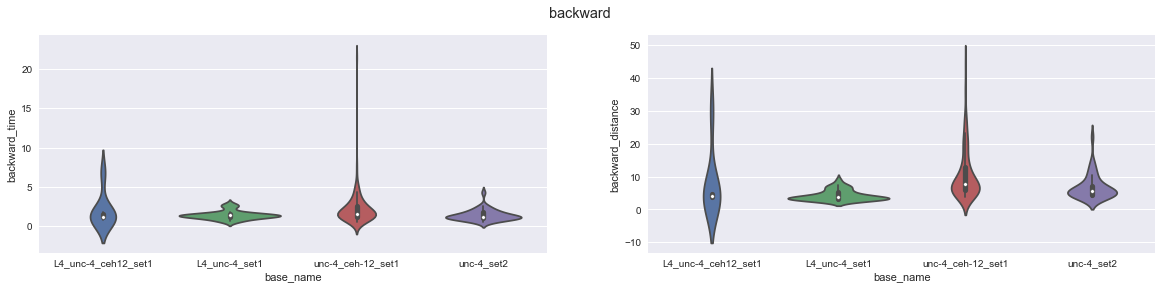

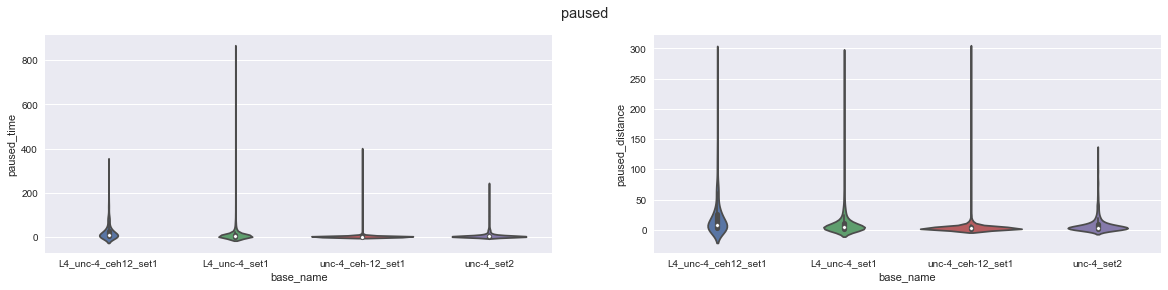

In [14]:
import numpy as np
import matplotlib.pylab as plt

def eventfeat2df(feat):
    dat = []
    for base_name in features_events:
        val = np.concatenate([x for key, x in features_events[base_name][feat].items()])
        df = pd.DataFrame({feat:val})
        df['base_name']  = base_name
        dat.append(df)
    return pd.concat(dat)  



for ftype1 in ['forward', 'backward', 'paused']:
    plt.figure(figsize=(20,4))
    for ii, ftype2 in enumerate(['_time', '_distance']):
        feat = ftype1 + ftype2
        plt.subplot(1,2,ii+1)
        
        feat_df = eventfeat2df(feat)
        feat_df = feat_df.dropna()
        sns.violinplot(x="base_name", y=feat, data=feat_df, order=lab_order)
    plt.suptitle(ftype1)




In [ ]:
for ftype1 in ['forward', 'backward', 'paused']:
    plt.figure(figsize=(20,4))
    for ii, ftype2 in enumerate(['_time', '_distance']):
        feat = ftype1 + ftype2
        plt.subplot(1,2,ii+1)
        
        feat_df = eventfeat2df(feat)
        feat_df = feat_df.dropna()
        sns.swarmplot(x="base_name", y=feat, data=feat_df, order=lab_order)
    plt.suptitle(ftype1)

